In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL




from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)#cache_dir->choosing directory, untar=unzipping

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses=list(data_dir.glob('roses/*'))
roses[:10]

[PosixPath('datasets/flower_photos/roses/3697780051_83e50a6dd1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6347846935_51e3dc2481_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3494252600_29f26e3ff0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/15965652160_de91389965_m.jpg'),
 PosixPath('datasets/flower_photos/roses/483444865_65962cea07_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5537794501_a0767743fd_n.jpg')]

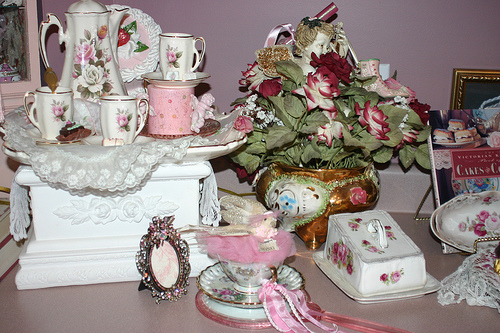

In [7]:
PIL.Image.open(str(roses[1]))

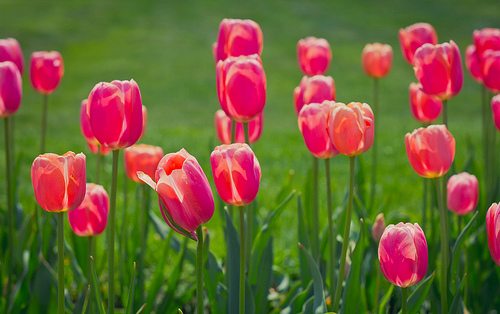

In [8]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_dict={
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflower':list(data_dir.glob('sunflowers/*')),
    }

In [10]:
flowers_labels={
    'roses':0,
    'tulips':1,
    'daisy':2,
    'dandelion':3,
    'sunflower':4
}

In [11]:
#reading image into opencv module

In [12]:
img=cv2.imread(str(flowers_dict['roses'][0]))
img.shape

(228, 240, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
x,y=[],[]

for i,j in flowers_dict.items():
    for image in j:
        img=cv2.imread(str(image))
        resize_img=cv2.resize(img,(180,180))
        x.append(resize_img)
        y.append(flowers_labels[i])


In [15]:
x=np.array(x)
y=np.array(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [17]:
X_train=X_train/255
X_test=X_test/255

In [18]:
X_train.shape

(2569, 180, 180, 3)

In [19]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


81/81 [==============================] - 14s 25ms/step - loss: 1.2292 - accuracy: 0.4866
Epoch 2/30
81/81 [==============================] - 2s 21ms/step - loss: 0.9181 - accuracy: 0.6411
Epoch 3/30
81/81 [==============================] - 2s 21ms/step - loss: 0.7380 - accuracy: 0.7201
Epoch 4/30
81/81 [==============================] - 2s 21ms/step - loss: 0.5044 - accuracy: 0.8124
Epoch 5/30
81/81 [==============================] - 2s 22ms/step - loss: 0.3714 - accuracy: 0.8723
Epoch 6/30
81/81 [==============================] - 2s 22ms/step - loss: 0.1696 - accuracy: 0.9482
Epoch 7/30
81/81 [==============================] - 2s 28ms/step - loss: 0.1055 - accuracy: 0.9731
Epoch 8/30
81/81 [==============================] - 2s 30ms/step - loss: 0.0766 - accuracy: 0.9794
Epoch 9/30
81/81 [==============================] - 2s 21ms/step - loss: 0.0987 - accuracy: 0.9774
Epoch 10/30
81/81 [==============================] - 2s 21ms/step - loss: 0.0428 - accuracy: 0.9899
Epoch 11/30
81/81 [

In [20]:
model.evaluate(X_test,Y_test)

35/35 [==============================] - 1s 15ms/step - loss: 2.1702 - accuracy: 0.6694


[2.170200824737549, 0.6693914532661438]

In [21]:
pred=model.predict(X_test)

35/35 [==============================] - 1s 11ms/step


In [22]:
pred_class=[np.argmax(i) for i in pred]

In [23]:
#Data augmentation

data_aug=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.9),
    layers.experimental.preprocessing.RandomRotation(0.9),

])

In [25]:
model_aug=Sequential([
    data_aug,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')

])
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_aug.fit(X_train, Y_train, epochs=100)

Epoch 1/100
81/81 [==============================] - 8s 31ms/step - loss: 1.4875 - accuracy: 0.3628
Epoch 2/100
81/81 [==============================] - 2s 30ms/step - loss: 1.2557 - accuracy: 0.4706
Epoch 3/100
81/81 [==============================] - 2s 30ms/step - loss: 1.1609 - accuracy: 0.5185
Epoch 4/100
81/81 [==============================] - 2s 31ms/step - loss: 1.1534 - accuracy: 0.5333
Epoch 5/100
81/81 [==============================] - 3s 33ms/step - loss: 1.0839 - accuracy: 0.5570
Epoch 6/100
81/81 [==============================] - 3s 31ms/step - loss: 1.1056 - accuracy: 0.5473
Epoch 7/100
81/81 [==============================] - 2s 31ms/step - loss: 1.0334 - accuracy: 0.5804
Epoch 8/100
81/81 [==============================] - 2s 31ms/step - loss: 1.0636 - accuracy: 0.5745
Epoch 9/100
81/81 [==============================] - 2s 30ms/step - loss: 1.0269 - accuracy: 0.5796
Epoch 10/100
81/81 [==============================] - 3s 33ms/step - loss: 1.0090 - accuracy: 0.5944

In [26]:
model_aug.evaluate(X_test,Y_test)

35/35 [==============================] - 1s 14ms/step - loss: 0.7462 - accuracy: 0.7466


[0.7461869120597839, 0.7465940117835999]

In [29]:
model.save("./flowers_model.model")